## Challenge : Sentimental Analysis

Again the UCI Machine Learning database has a nice labeled [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance, test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [74]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB



# Data from yelp dataset
data_path = ('./yelp_labelled.txt')

#data_path = ('./amazon_cells_labelled.txt')


data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns = ['message', 'positive']



In [113]:
#Having words related to positive comments

keywords = ['love','good','great','awesome','liked','excellent','cool','happy','friendly',
            'lovely','delicious','loved','yummy','wonderful','amazing','ok','best','better',
           'well','tasty','special','flavorful']

for key in keywords:
    data_raw[str(key)] = data_raw.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw['allcaps'] = data_raw.message.str.isupper()

In [114]:
data_raw['positive'] = (data_raw['positive'] == 1)

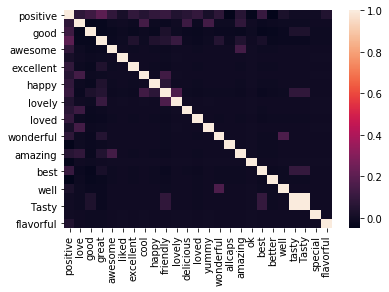

In [115]:
#Verifying if variables are independent
sns.heatmap(data_raw.corr())

In [111]:
#Make some feature engineering and verify the nulls in heatmap above


new_keywords = ''


In [112]:
#Creating the model

data = data_raw[keywords + ['allcaps']]
target = data_raw['positive']


# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 359


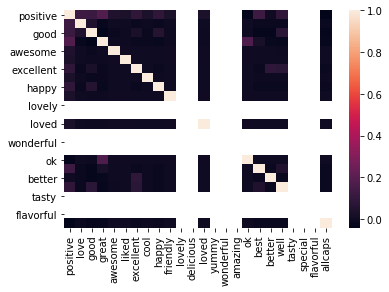

In [118]:
#Testing with another dataset (amazon)

data_path = ('./amazon_cells_labelled.txt')
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns = ['message', 'positive']


for key in keywords:
    data_raw[str(key)] = data_raw.message.str.contains(' ' + str(key) + ' ',case=False)
   
data_raw['allcaps'] = data_raw.message.str.isupper()

data_raw['positive'] = (data_raw['positive'] == 1)

#Verifying if variables are independent
sns.heatmap(data_raw.corr())




In [120]:
#Make some feature engineering and verify the nulls in heatmap above
new_keywords = ''



#Creating the model

data = data_raw[keywords + ['allcaps']]
target = data_raw['positive']


# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 386


## Conclusions:

- More words in our keywords variable, more accurate is the model
- Keywords should be very related to the dataset context to be  more accurate
